# PyPlot

This file demonstrates how to create plots in Julia by using the PyPlot package

PyPlot relies on the matplotlib library, which is part of Python. If you have Python installed, then it will be used as is. Otherwise, see PyPlot's homepage
https://github.com/stevengj/PyPlot.jl
for instruction on how to install what is needed.

A nice collection of examples are available at
https://gist.github.com/gizmaa/7214002

Notice: Restart Julia before running this file (at least if you have used another plotting package)

In [1]:
using PyPlot
PyPlot.svg(true)         #prettier figures. Comment out if it gives problems

true

# A First Plot

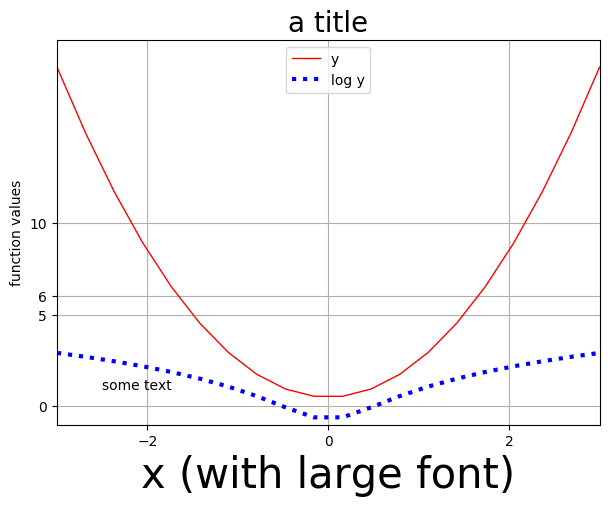

In [2]:
x = linspace(-3,3,20)                 #create some "data" to plot

y = 2*x.^2 + 0.5

figure(figsize=(7,5))
  plot(x,y,linestyle="-",color="r",linewidth=1.0)
  plot(x,log.(y),linestyle=":",color="b",linewidth=3.0)
  plt[:xticks]([-2;0;2])       
  plt[:yticks]([0;5;6;10])  
  grid("on")
  title("a title",fontsize=20)
  xlim(-3,3)               # set limits of the x-axis
  ylim(-1,20)              # set limits of the y-axis
  xlabel("x (with large font)",fontsize=30)
  ylabel("function values")
  text(-2.5,0.9,"some text")
  legend(["y";"log y"],loc="upper center")
savefig("AFirstPlot.pdf")      #save pdf file of the plot
#show()                        #not needed any more

# Subplots

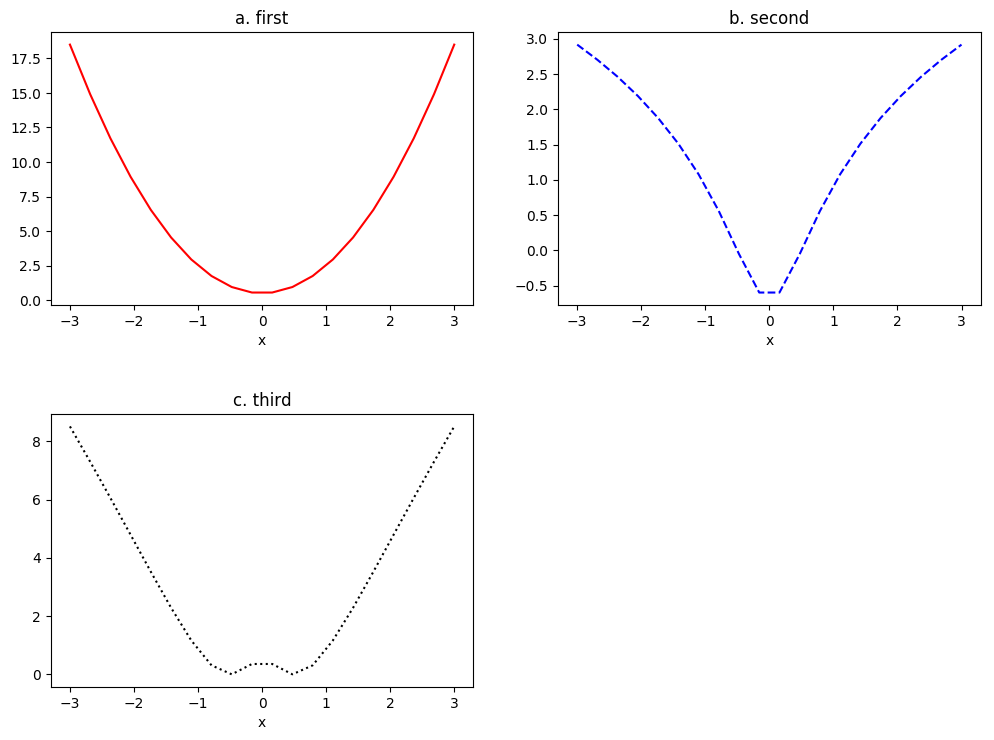

PyObject <matplotlib.text.Text object at 0x0000000022E8E390>

In [3]:
figure(figsize=(12,8.5))                      #subplots
subplots_adjust(hspace = 0.4)
subplot(221)
  plot(x,y,"r-")
  title("a. first")
  xlabel("x")
subplot(222)
  plot(x,log.(y),"b--")
  title("b. second")
  xlabel("x")
subplot(223)
  plot(x,log.(y).^2,"k:")
  title("c. third")
  xlabel("x")
#show()

# Adding Horizontal and Vertical Lines

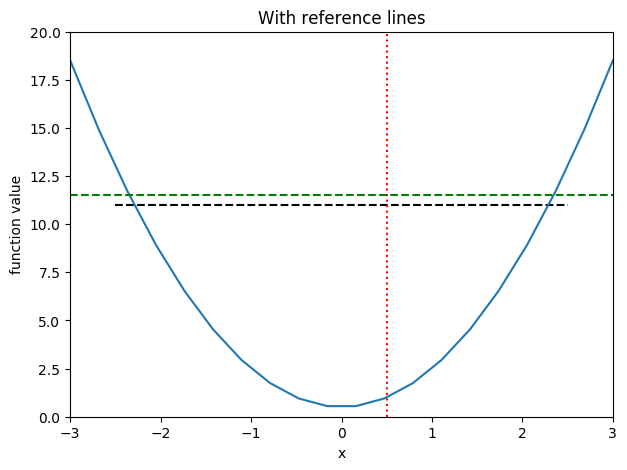

PyObject <matplotlib.collections.LineCollection object at 0x0000000020B2DA20>

In [4]:
figure(figsize=(7,5))
  plot(x,y)
  xlim(-3,3)
  ylim(0,20)
  title("With reference lines")
  xlabel("x")
  ylabel("function value")
  hlines(11,-2.5,2.5,linestyle="--",color="black")   #streches over x=[-2.5;2.5] 
  axhline(11.5,linestyle="--",color="g")             #streches over all x
  vlines(0.5,0,20,linestyle=":",color="r")
#show()

# LaTeX in the Figure

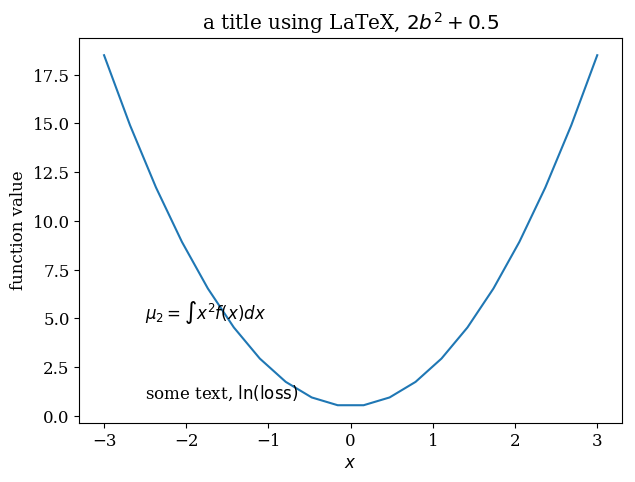

In [6]:
using LaTeXStrings                 #add some LaTeX to the figure

PyPlot.matplotlib[:rc]("font",family="serif",size=12)  #font similar to LaTeX
figure(figsize=(7,5))
  plot(x,y)
  title(L"a title using LaTeX, $2 b^2 + 0.5$")
  xlabel(L"$x$")
  ylabel("function value")
  text(-2.5,0.9,L"some text, $\ln(\mathrm{loss})$")
  text(-2.5,5,L"$\mu_2 = \int x^2 f(x) dx$")
#show()

PyPlot.matplotlib[:rc]("font",family="sans-serif",size=12)  #resetting the font

# Bars (with annotation) and Stairs

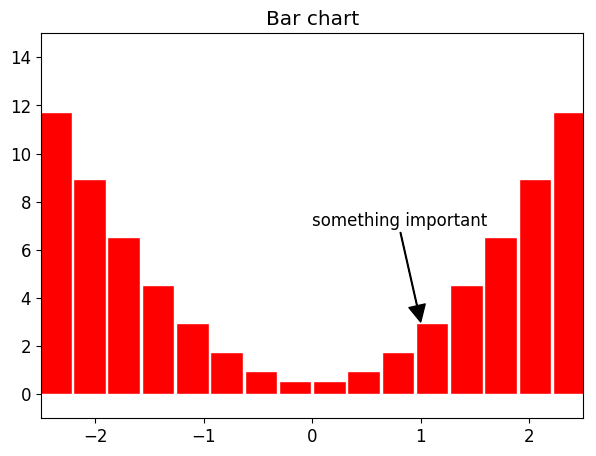

PyObject <matplotlib.text.Annotation object at 0x0000000025B87198>

In [7]:
figure(figsize=(7,5))       
  bar(x,y,facecolor="red",edgecolor="white",align="center",width=0.3)
  xlim(-2.5,2.5)              
  ylim(-1,15)              
  title("Bar chart")
  txt = "something important"
  annotate(txt,xy=[0.7;0.25],xycoords="axes fraction",xytext=[0.5;0.5],
           textcoords="axes fraction",arrowprops=Dict("facecolor"=>"black","width"=>0.5))
#show()

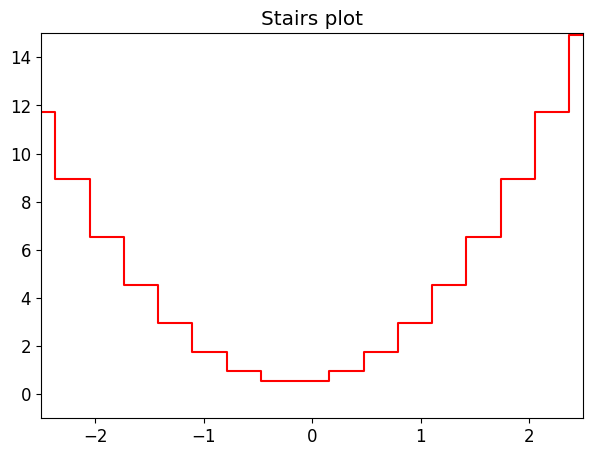

PyObject <matplotlib.text.Text object at 0x0000000022F80B38>

In [8]:
figure(figsize=(7,5))
  step(x,y,linewidth=1.5,color="r")
  xlim(-2.5,2.5)              
  ylim(-1,15)              
  title("Stairs plot")
#show()

# Surface (3D) Plots

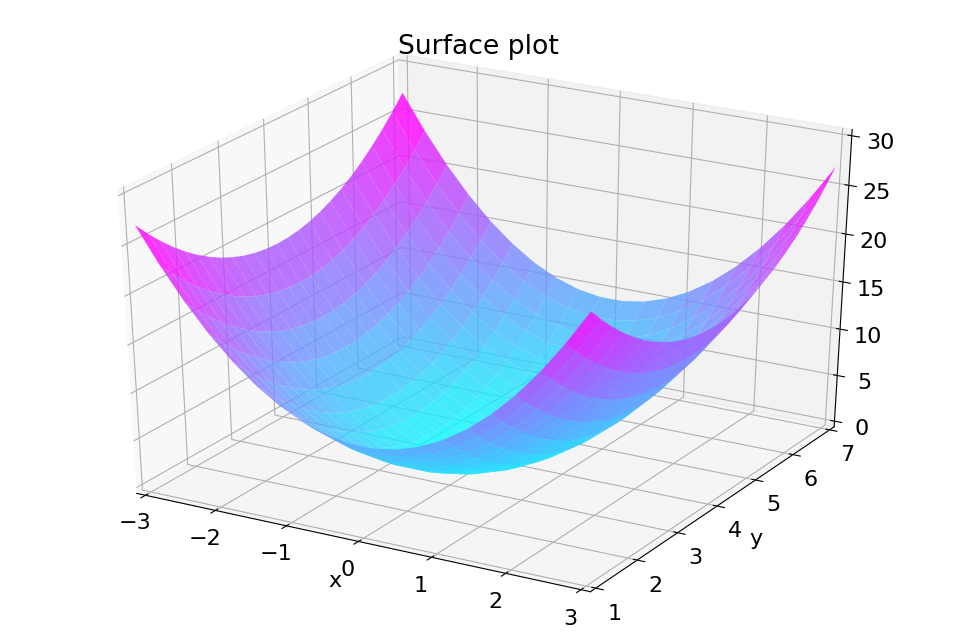

(20,)(25,)(20, 25)


PyObject <matplotlib.text.Text object at 0x0000000025C8F048>

In [9]:
x = linspace(-3,3,20)                 #create some "data" to plot
y = linspace(1,7,25)

z = fill(NaN,(length(x),length(y)))  #to put results in, initialized as NaNs
for j = 1:length(y)                   #create z2 column by column
  z[:,j] = 2*x.^2 + (y[j]-4)^2 - 0.0*x.*(y[j]-4)
end

#notice the arguments: x,y,z'
println(size(x),size(y),size(z))

PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(12,8))
  surf(x,y,z',rstride=1,cstride=1,cmap=ColorMap("cool"),alpha=0.8)    
  xlim(-3,3)              #change rstride and cstride to improve the look            
  ylim(1,7)
  zlim(0,30)
  xlabel("x")
  ylabel("y")
  title("Surface plot")
#show()

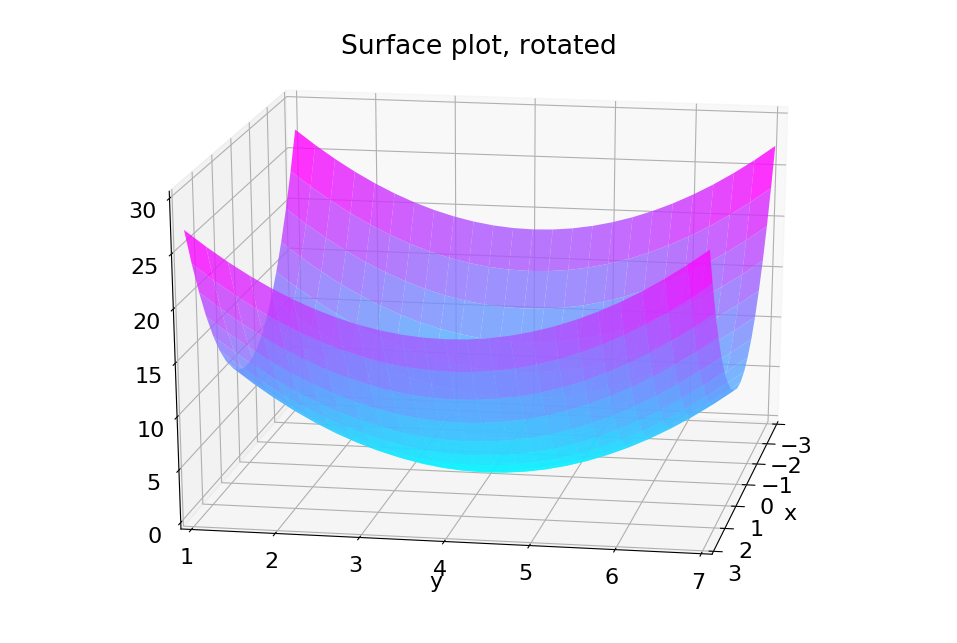

PyObject <matplotlib.text.Text object at 0x0000000026888780>

In [10]:
PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(12,8))
ax = gca(projection="3d")                          #notice
  surf(x,y,z',rstride=1,cstride=1,cmap=ColorMap("cool"),alpha=0.8)    
  xlim(-3,3)              #change rstride and cstride to improve the look            
  ylim(1,7)
  zlim(0,30)
  ax[:view_init](elev=20.0,azim=10)               #notice: elevation and azimuth
  xlabel("x")
  ylabel("y")
  title("Surface plot, rotated")
#show()

# Scatter and Histogram

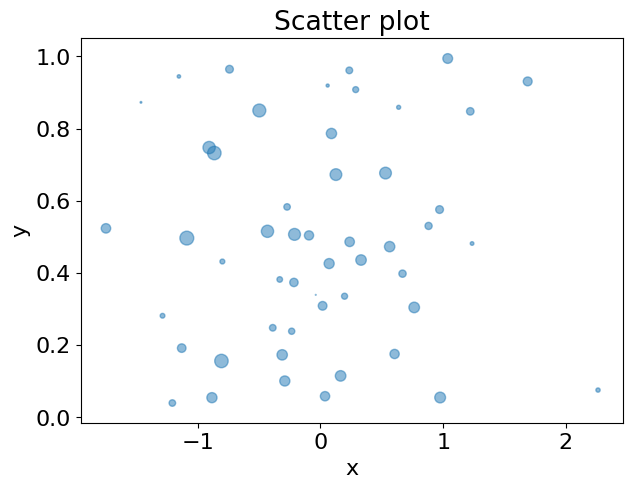

PyObject <matplotlib.text.Text object at 0x0000000025B69A90>

In [11]:
N = 51
x = randn(N,1)                         #SCATTER, HISTOGRAM
y = rand(N,1)
areas = rand(51)*100                   #size of the scatter points

figure(figsize=(7,5))
  scatter(x,y,s=areas,alpha=0.5)       #s is the size of the circles. Can be a constant
  title("Scatter plot")
  xlabel("x")
  ylabel("y")
#show()

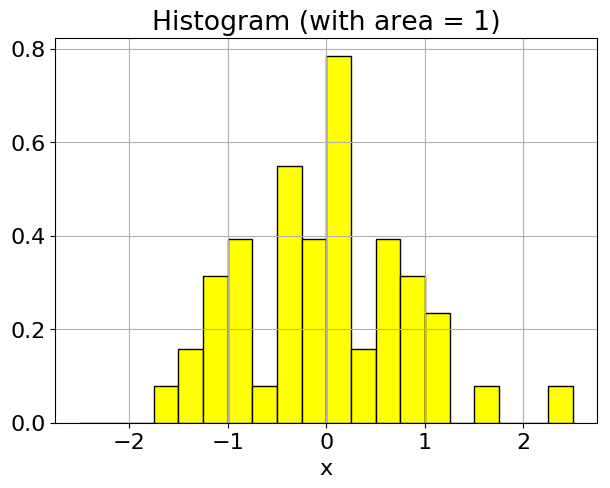

PyObject <matplotlib.text.Text object at 0x0000000025B3C1D0>

In [12]:
figure(figsize=(7,5))
  PyPlot.plt[:hist](x,bins=-2.5:0.25:2.5,normed=true,color="yellow",edgecolor="k")            #long name to avoid naming conflict
  grid("on")
  title("Histogram (with area = 1)")
  xlabel("x")
#show()

# Time Series Plots

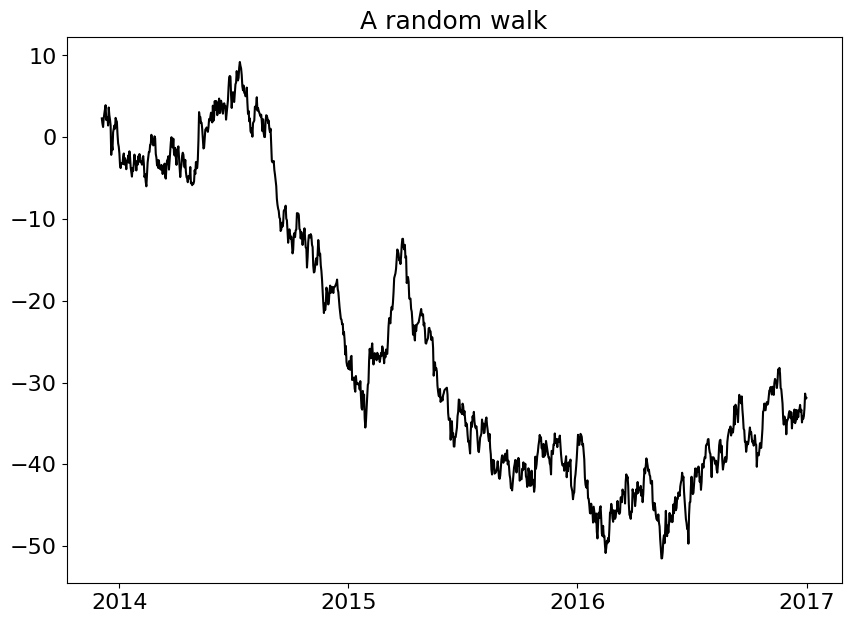

PyObject <matplotlib.text.Text object at 0x0000000026854A90>

In [13]:
dN = Date(2013,12,4):Dates.Day(1):Date(2016,12,31)   #just faking some dates
dN = collect(dN)                                     #to a vector
y  = randn(length(dN),1)                             #some random numbers to plot 

xTicks = Date(2014,1,1):Dates.Year(1):Date(2017,1,1)
figure(figsize=(10,10/1.41))          #basic time series plot
  plot_date(dN,cumsum(y),"k-")
  plt[:xticks](xTicks)
  title("A random walk",fontsize=18)
#show()